# Assignment 12: Akash

## Pull, clean out zero unmasked, and clip data to bounds for continous Z values

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2
import scipy.stats as stats

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

# chopping data based on thresholds on x and y coordinates
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False
    
    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv,
                                                 x_bounds, y_bounds))
data_thresholded = csv[indices_in_bound]
n = data_thresholded.shape[0]


def synapses_over_unmasked(row):
    s = (row[4]/row[3])*(64**3)
    return [row[0], row[1], row[2], s]

syn_unmasked = np.apply_along_axis(synapses_over_unmasked, 1, data_thresholded)
syn_normalized = syn_unmasked
print 'end setup'

end setup


## Set up cluster

In [2]:
import sklearn.mixture as mixture

n_clusters = 4
gmm = mixture.GMM(n_components=n_clusters, n_iter=1000, covariance_type='diag')
labels = gmm.fit_predict(syn_unmasked)
clusters = []
for l in range(n_clusters):
    a = np.where(labels == l)
    clusters.append(syn_unmasked[a,:])

print len(clusters)
print clusters[0].shape

4
(1L, 6945L, 4L)


## 1) Visalize each cluster individually in space


Visualization of cluster: 1


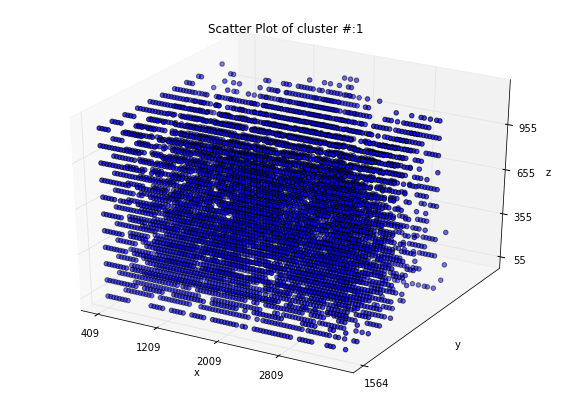


Visualization of cluster: 2


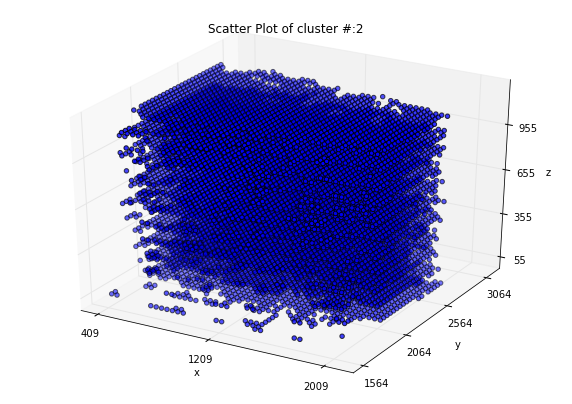


Visualization of cluster: 3


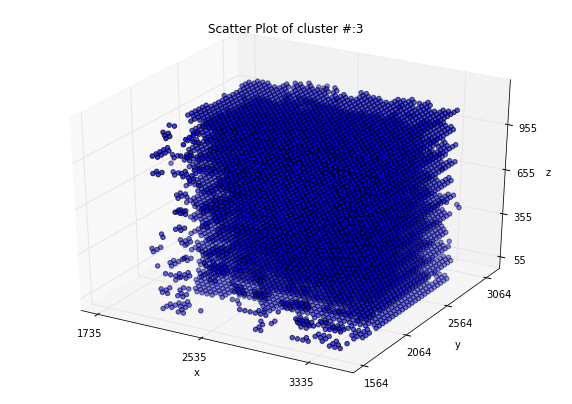


Visualization of cluster: 4


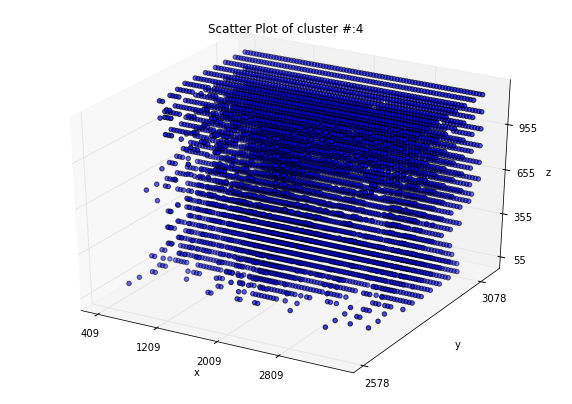

In [3]:
from mpl_toolkits.mplot3d import Axes3D
counter = 0
for cluster in clusters:
    s = cluster.shape
    cluster = cluster.reshape((s[1], s[2]))
    counter += 1
    print 
    print'Visualization of cluster: ' + str(counter)
    X = cluster[:, (0,1,2)] # x,y,z
    Y = cluster[:,-1] # syn/unmasked from spike
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca(projection='3d')
    ax.view_init()
    ax.dist = 10  # distance
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    title = 'Scatter Plot of cluster #:' + str(counter)
    ax.set_title(title)
    ax.set_xticks(np.arange(min(cluster[:,0]), max(cluster[:,0])+1, 800))
    ax.set_yticks(np.arange(min(cluster[:,1]), max(cluster[:,1])+1, 500))
    ax.set_zticks(np.arange(min(cluster[:,2]), max(cluster[:,2])+1, 300))

    ax.scatter(
        cluster[:, 0], cluster[:, 1], cluster[:, 2],
        #c = counter
    )  # data
      # marker colour
                

    plt.show()  

## 2) Scale historams of cluster, compare to histogram of all data (extension of HW 11.5)


Working on cluster: 1
Done with cluster

Working on cluster: 2
Done with cluster

Working on cluster: 3
Done with cluster

Working on cluster: 4
Done with cluster


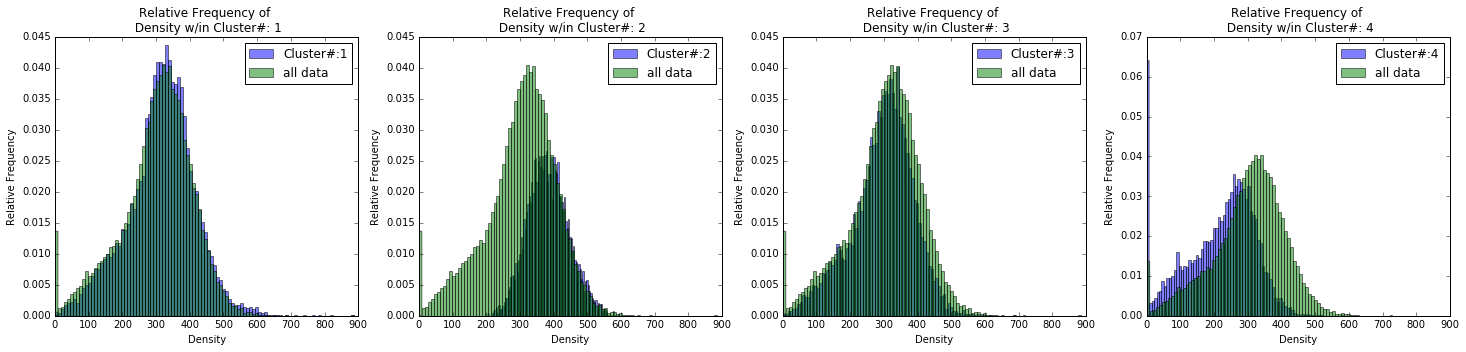

In [51]:
counter = 0
fig, axs = plt.subplots(1,4,figsize=(25,5))
for cluster in clusters:
    s = cluster.shape
    #cluster = cluster.reshape((s[1], s[2]))
    counter += 1
    print 
    print'Working on cluster: ' + str(counter)
   
    
    weights = np.ones_like(cluster[:,-1])/len(cluster[:,-1])
    weights2 = np.ones_like(syn_unmasked[:,-1])/len(syn_unmasked[:,-1])
    
    figure = plt.figure()
    axs[counter-1].hist(cluster[:,-1], bins = 100, alpha = 0.5, weights = weights, label = 'Cluster#:'+str(counter))
    axs[counter-1].hist(syn_unmasked[:,-1], bins = 100, alpha = 0.5, weights = weights2, label = 'all data')
    axs[counter-1].set_title('Relative Frequency of \n Density w/in Cluster#: '+ str(counter))
    axs[counter-1].set_xlabel('Density')
    axs[counter-1].set_ylabel('Relative Frequency')
    axs[counter-1].legend()
   
   
 
    print "Done with cluster"
    
plt.show()

## 3) Centroid of clusters, scaled by average density of cluster.

Back to 4 clusters, but similar visually to HW 9

[0, 0, 0, 0]
# of samples in cluster 1: 10413
centroid:  [ 2847.985  2298.506   612.963   315.191]
# of samples in cluster 2: 6885
centroid:  [ 1885.862  1734.592   594.458   382.929]
# of samples in cluster 3: 11317
centroid:  [ 1214.271  2324.484   619.122   295.86 ]
# of samples in cluster 4: 7421
centroid:  [ 1938.146  2952.518   631.569   215.213]
[[ 2847.985  2298.506   612.963   315.191]
 [ 1885.862  1734.592   594.458   382.929]
 [ 1214.271  2324.484   619.122   295.86 ]
 [ 1938.146  2952.518   631.569   215.213]]


<function matplotlib.pyplot.show>

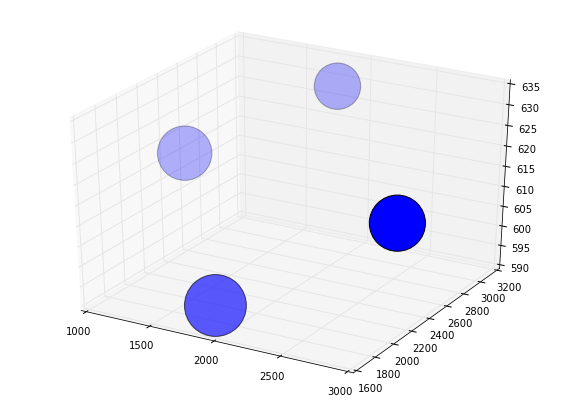

In [47]:
n_clusters = 4
###########################################
gmm = mixture.GMM(n_components=n_clusters, n_iter=1000, covariance_type='diag', random_state=1)
clusters = [[] for i in xrange(n_clusters)]
centroidmatrix = [0]*4
print centroidmatrix

predicted = gmm.fit_predict(syn_unmasked)
for label, row in zip(predicted, syn_unmasked[:,]):
    clusters[label].append(row)

    
for i in xrange(n_clusters):
    clusters[i] = np.array(clusters[i])
    print "# of samples in cluster %d: %d" % (i+1, len(clusters[i])) 
    print "centroid: ", np.average(clusters[i], axis=0)
    centroidmatrix = np.vstack((centroidmatrix,np.average(clusters[i], axis=0)))
  
    plt.show

centroidmatrix = np.delete(centroidmatrix,0,0)    

print centroidmatrix

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.scatter(
       centroidmatrix[:, 0], centroidmatrix[:, 1], centroidmatrix[:, 2],  # data
       c='blue',  # marker colour
       marker='o',  # marker shape
       s=centroidmatrix[:,3]*10  # marker size
)




plt.show

## 4) Distribution of density in different clusters

Fix boxplots from hw 11

(10413L, 4L)

Working on cluster: 1


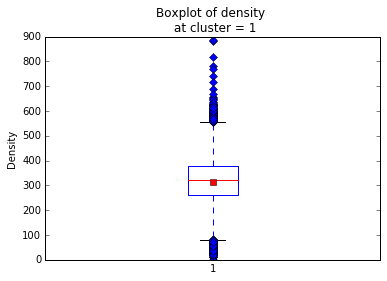

Done with cluster
(6885L, 4L)

Working on cluster: 2


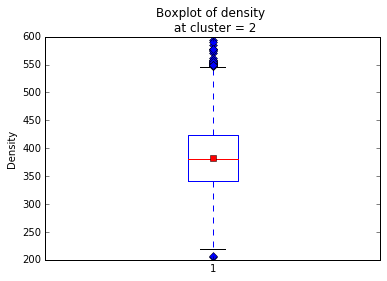

Done with cluster
(11317L, 4L)

Working on cluster: 3


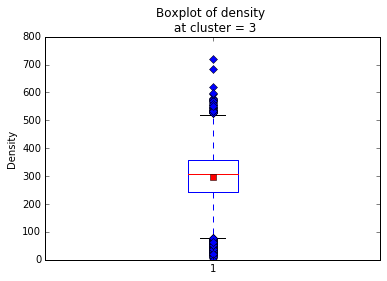

Done with cluster
(7421L, 4L)

Working on cluster: 4


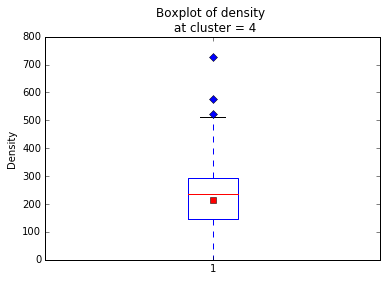

Done with cluster


In [9]:
counter = 0
indx = 0
indy = 0
for cluster in clusters:
    s = cluster.shape
    print s
    #cluster = cluster.reshape((s[1], s[2]))
    counter += 1
    print 
    print'Working on cluster: ' + str(counter)
    plt.boxplot(cluster[:,-1], 0, 'gD', showmeans=True)
    plt.xticks([1])
    plt.ylabel('Density')
    plt.title('Boxplot of density \n at cluster = ' + str(int(counter)))
    plt.show()
    
 
    print "Done with cluster"
plt.show()

## 5) Distribution along z layers

Density Distrubtion Boxplots:


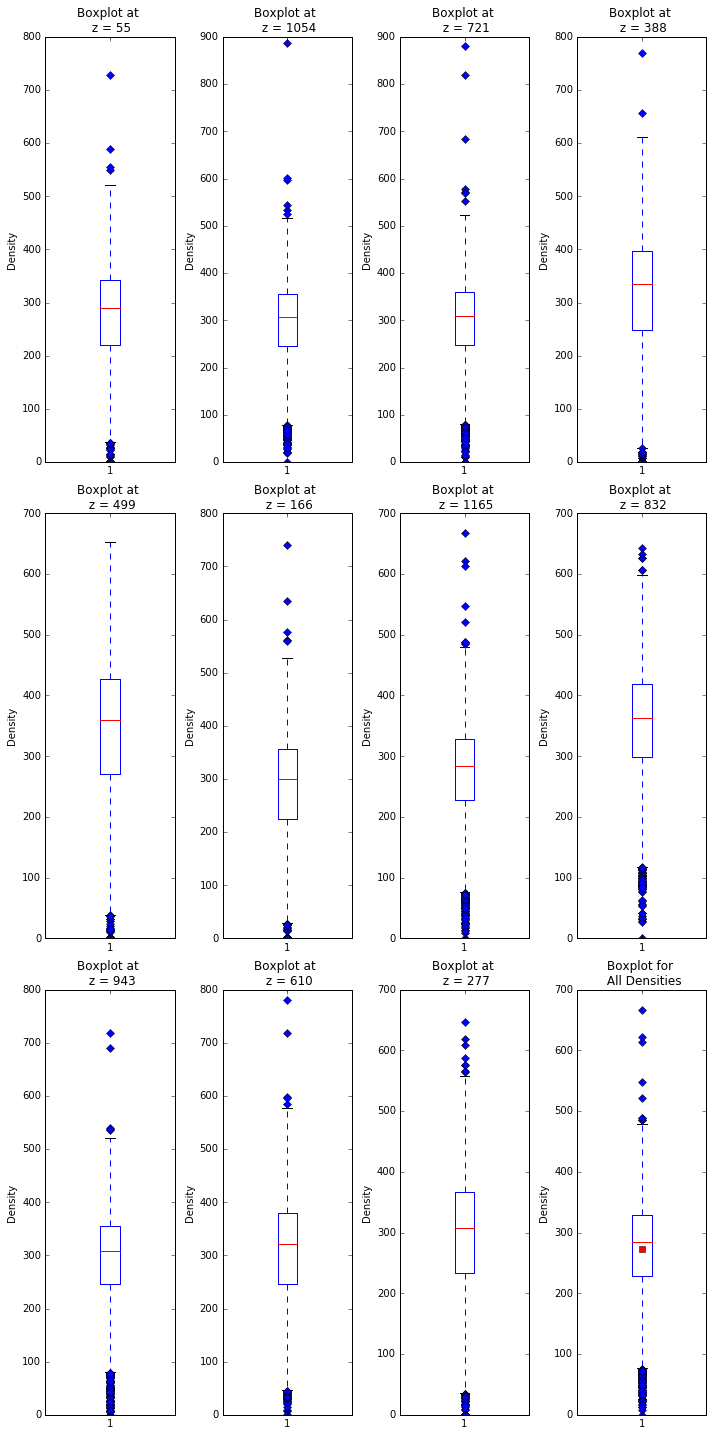

In [10]:
data_uniques, UIndex, UCounts = np.unique(syn_unmasked[:,2], return_index = True, return_counts = True)
'''
print 'uniques'
print 'index: ' + str(UIndex)
print 'counts: ' + str(UCounts)
print 'values: ' + str(data_uniques)
'''
fig, ax = plt.subplots(3,4,figsize=(10,20))
counter = 0

for i in np.unique(syn_unmasked[:,2]):
    # print 'calcuating for z: ' + str(int(i))
    
    def check_z(row):
        if row[2] == i:
            return True
        return False
   
    counter += 1
    xind = (counter%3) - 1
    yind = (counter%4) - 1
     
    index_true = np.where(np.apply_along_axis(check_z, 1, syn_unmasked))
    syn_uniqueZ = syn_unmasked[index_true]
    
    ax[xind,yind].boxplot(syn_uniqueZ[:,3], 0, 'gD')
    ax[xind,yind].set_xticks([1], i)
    ax[xind,yind].set_ylabel('Density')
    ax[xind,yind].set_title('Boxplot at \n z = ' + str(int(i)))

#print 'yind = %d, xind = %d' %(yind,xind)
#print i

ax[xind+1,yind+1].boxplot(syn_uniqueZ[:,3], 0, 'gD',showmeans=True)
ax[xind+1,yind+1].set_xticks([1], 'set')
ax[xind+1,yind+1].set_ylabel('Density')
ax[xind+1,yind+1].set_title('Boxplot for \n All Densities')

print "Density Distrubtion Boxplots:"
plt.tight_layout()

plt.show()